In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
df=pd.read_excel('/content/income(1).csv.xlsx')
df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45.0,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,28.0,United-States,"less than or equal to 50,000"
1,24.0,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
2,44.0,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,"greater than 50,000"
3,27.0,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0.0,0.0,40.0,Mexico,"less than or equal to 50,000"
4,20.0,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0.0,0.0,35.0,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34.0,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594.0,0.0,60.0,United-States,"less than or equal to 50,000"
31974,34.0,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
31975,23.0,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
31976,42.0,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,"less than or equal to 50,000"


In [3]:
df.shape


(31978, 13)

In [4]:
df.info

<bound method DataFrame.info of         age      JobType  ...  nativecountry                        SalStat
0      45.0      Private  ...  United-States   less than or equal to 50,000
1      24.0  Federal-gov  ...  United-States   less than or equal to 50,000
2      44.0      Private  ...  United-States            greater than 50,000
3      27.0      Private  ...         Mexico   less than or equal to 50,000
4      20.0      Private  ...  United-States   less than or equal to 50,000
...     ...          ...  ...            ...                            ...
31973  34.0    Local-gov  ...  United-States   less than or equal to 50,000
31974  34.0    Local-gov  ...  United-States   less than or equal to 50,000
31975  23.0      Private  ...  United-States   less than or equal to 50,000
31976  42.0    Local-gov  ...  United-States   less than or equal to 50,000
31977  29.0      Private  ...  United-States   less than or equal to 50,000

[31978 rows x 13 columns]>

In [5]:
df.dtypes

age              float64
JobType           object
EdType            object
maritalstatus     object
occupation        object
relationship      object
race              object
gender            object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
nativecountry     object
SalStat           object
dtype: object

In [6]:
df.isnull().sum()/(len(df))*100

age              0.0
JobType          0.0
EdType           0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
gender           0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
nativecountry    0.0
SalStat          0.0
dtype: float64

In [7]:
df[['capitalgain', 'capitalloss']]

,capitalgain,capitalloss
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
31973,594.0,0.0
31974,0.0,0.0
31975,0.0,0.0
31976,0.0,0.0


In [8]:
df.drop(columns=['capitalgain', 'capitalloss' ,'maritalstatus' ,'relationship'], inplace=True)

In [9]:
df.shape

(31978, 9)

In [10]:
df.SalStat.value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

In [11]:
cols = ['JobType', 'EdType',  'occupation',  'race', 'gender', 'nativecountry', 'SalStat']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,age,JobType,EdType,occupation,race,gender,hoursperweek,nativecountry,SalStat
0,45.0,4,11,1,4,0,28.0,38,1
1,24.0,1,11,2,4,1,40.0,38,1
2,44.0,4,15,10,4,1,40.0,38,0
3,27.0,4,6,3,4,1,40.0,25,1
4,20.0,4,15,12,4,1,35.0,38,1


In [13]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['SalStat']), df['SalStat'], test_size = 0.4)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19186, 8), (19186,), (12792, 8), (12792,))

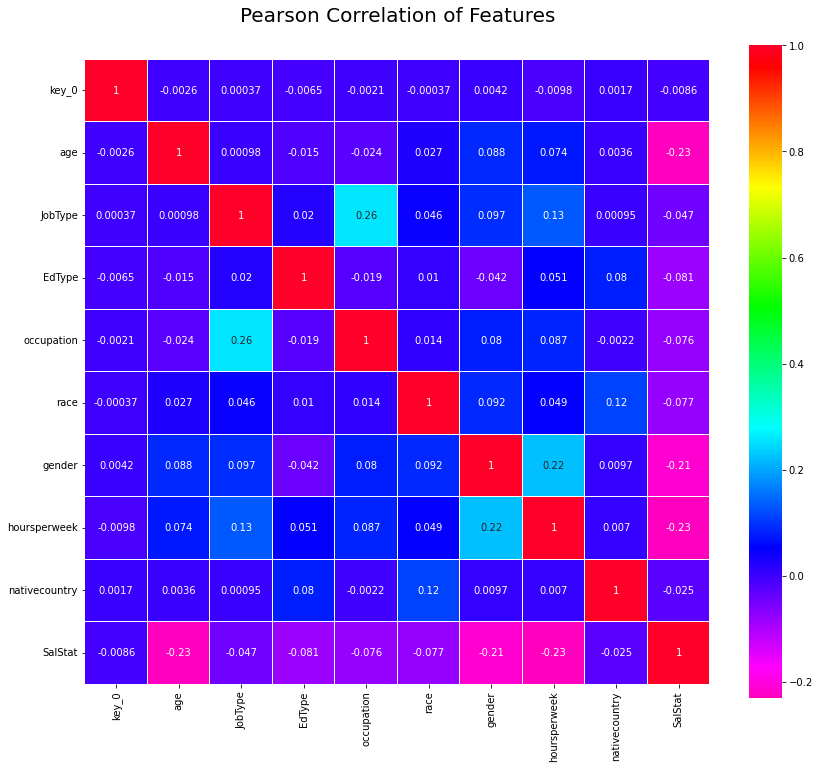

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [15]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []

In [16]:
algo = "Logistic Regression"
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Logistic Regression is :', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall Logistic Regression is :', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision Logistic Regression is :', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score Logistic Regression is :', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Logistic Regression
[[ 486 2605]
 [ 445 9256]] 


Accuracy Logistic Regression is : 76.15697310819262
Recall Logistic Regression is : 95.41284403669725
Precision Logistic Regression is : 78.03726498608886
F score Logistic Regression is : 85.85474445784251


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
algo = "K Nearest Neighbour"
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy for K Nearest Neighbour is :', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall K Nearest Neighbour is :', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision is K Nearest Neighbour :', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score is K Nearest Neighbour :', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

K Nearest Neighbour
[[1392 1699]
 [1277 8424]] 


Accuracy for K Nearest Neighbour is : 76.73545966228893
Recall K Nearest Neighbour is : 86.83640861766828
Precision is K Nearest Neighbour : 83.21643781487701
F score is K Nearest Neighbour : 84.98789346246973


In [18]:
algo = "Decision Tree"
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Decision Tree is :', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall Decision Tree is :', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision Decision Tree is :', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score Decision Tree is :', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Decision Tree
[[1604 1487]
 [1726 7975]] 


Accuracy Decision Tree is : 74.88273921200751
Recall Decision Tree is : 82.20801979177405
Precision Decision Tree is : 84.28450644683998
F score Decision Tree is : 83.23331419923812


In [19]:
algo = "Naive Bayes"
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Naive Bayes is :', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall Naive Bayes is :', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision Naive Bayes is :', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score Naive Bayes is :', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Naive Bayes
[[1781 1310]
 [1733 7968]] 


Accuracy Naive Bayes is : 76.21169480925577
Recall Naive Bayes is : 82.13586228223895
Precision Naive Bayes is : 85.88057771071351
F score Naive Bayes is : 83.96648927762264


In [20]:
algo = "Random Forest"
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Random Forest is :', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall Random Forest is :', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision Random Forest is :', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score Random Forest is :', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Random Forest
[[1459 1632]
 [1068 8633]] 


Accuracy Random Forest is : 78.89305816135085
Recall Random Forest is : 88.9908256880734
Precision Random Forest is : 84.10131514856309
F score Random Forest is : 86.47701091856156


In [21]:
new = pd.DataFrame(list(zip(algos ,accuracy,recall ,precision ,f1Score)), columns = ('algo' ,'acc' ,'rec' ,'pre','f1s'))
new

,algo,acc,rec,pre,f1s
0,Logistic Regression,76.156973,95.412844,78.037265,85.854744
1,K Nearest Neighbour,76.735460,86.836409,83.216438,84.987893
2,Decision Tree,74.882739,82.208020,84.284506,83.233314
3,Naive Bayes,76.211695,82.135862,85.880578,83.966489
4,Random Forest,78.893058,88.990826,84.101315,86.477011


<BarContainer object of 5 artists>

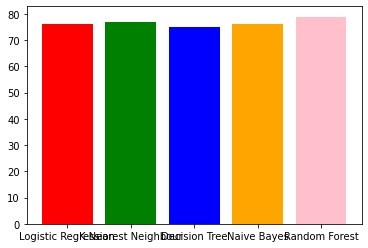

In [22]:

plt.bar(algos, accuracy,width = 0.8, color = ['red', 'green','blue' ,'orange' ,'pink'])